# Pymaceuticals

In [67]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [68]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Files to Load 
mouse_file = "Data/mouse_drug_data.csv"
clinical_file = "Data/clinicaltrial_data.csv"

In [70]:
# Read the files
mouse_data = pd.read_csv(mouse_file)
clinical_data = pd.read_csv(clinical_file)

##### Combined dataset

In [71]:
# Combine the data into a single dataset by mouse id
clinical_mouse_data = pd.merge(clinical_data, mouse_data, on = "Mouse ID", how = "left")

# Display the combined data
clinical_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [72]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = clinical_mouse_data.groupby(["Drug", "Timepoint"], as_index=False).mean()

del mean_tumor_volume["Metastatic Sites"]

mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [73]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#  First select the columns necessary for the calculation
clinical_info=clinical_mouse_data[["Drug","Timepoint", "Tumor Volume (mm3)"]]

# Calculate standard error volume 
standard_error_volume = clinical_info.groupby(["Drug", "Timepoint"]).sem()

# Reset the index value to remove groupby values as indexes
standard_error_volume = standard_error_volume.reset_index()
 
# Preview DataFrame
standard_error_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [74]:
# Create the new dataframe with new formatting
drug_data= pd.pivot_table(mean_tumor_volume, index= "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
drug_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [75]:
# Select the error values for Capomulin, Infubinol, Ketapril and Placebo to use for the plot
errors1 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Capomulin"), "Tumor Volume (mm3)"]
errors2 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Infubinol"), "Tumor Volume (mm3)"]
errors3 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Ketapril"), "Tumor Volume (mm3)"]
errors4 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Placebo"), "Tumor Volume (mm3)"]

errors1

0    0.000000
1    0.448593
2    0.702684
3    0.838617
4    0.909731
5    0.881642
6    0.934460
7    1.052241
8    1.223608
9    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [76]:
# Select the columns that needed for the plot
drug_df = drug_data[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Reset the index to reach the columns
drug_info = drug_df.reset_index()
drug_info

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


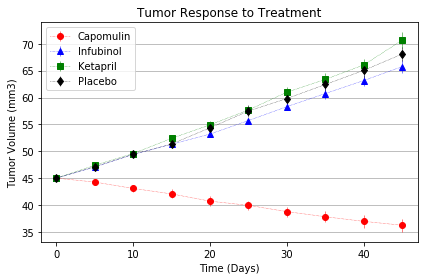

In [77]:
# Generate the Plot (with Error Bars)

# Create a scatter plot for Capomulin values
plt.errorbar(drug_info["Timepoint"],drug_info["Capomulin"], yerr=errors1, color="red", fmt="o", linestyle=":", label="Capomulin", lw=0.5)

# Create a scatter plot for Infubinol values
plt.errorbar(drug_info["Timepoint"],drug_info["Infubinol"], yerr=errors2, color="blue", fmt="^", linestyle=":", label="Infubinol", lw=0.5)

# Create a scatter plot for Ketapril values
plt.errorbar(drug_info["Timepoint"],drug_info["Ketapril"], yerr=errors3, color ="green", fmt="s", linestyle=":", label="Ketapril", lw=0.5)

# Create a scatter plot for Placebo values
plt.errorbar(drug_info["Timepoint"],drug_info["Placebo"], yerr=errors4, color="black", fmt="d", linestyle=":", label="Placebo", lw=0.5)


# Add labels and limits to the plot
plt.grid(axis="y")
plt.xlim(-2, max(drug_info["Timepoint"]) + 2)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best", fancybox=True)

# Save the Figure
plt.tight_layout()
plt.savefig("../Images/treatment.png")
plt.show()

## Metastatic Response to Treatment

In [78]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Clean data and select desired columns: drug, timepoint, metastatic sites
metastatic_df = clinical_mouse_data[["Drug", "Timepoint", "Metastatic Sites"]]

# Group the dataframe by drug and timepoint and calculate mean
metastatic_mean = metastatic_df.groupby(["Drug", "Timepoint"]).mean()

# Display the grouped dataframe
metastatic_mean.head()  

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [79]:
# Reset the index to select mean values of metastatic sites for drugs
metastatic_mean = metastatic_mean.reset_index()


In [80]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_error = metastatic_df.groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
metastatic_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [81]:
# Reset the index value to select drug columns
metastatic_error = metastatic_error.reset_index()

In [86]:
# Select error values for desired drugs

metastatic_error1= metastatic_error.loc[(metastatic_error["Drug"] == "Capomulin"), "Metastatic Sites"]
metastatic_error2= metastatic_error.loc[(metastatic_error["Drug"] == "Infubinol"), "Metastatic Sites"]
metastatic_error3= metastatic_error.loc[(metastatic_error["Drug"] == "Ketapril"), "Metastatic Sites"]
metastatic_error4= metastatic_error.loc[(metastatic_error["Drug"] == "Placebo"), "Metastatic Sites"]

metastatic_error    

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [87]:
# Create the new data frame for each drugs metastatic values
metastatic_sites = pd.pivot_table(metastatic_df, index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Display the dataframe
metastatic_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [88]:
# Reset the index to select the necessary columns for plot
metastatic_sites = metastatic_sites.reset_index()
metastatic_sites.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


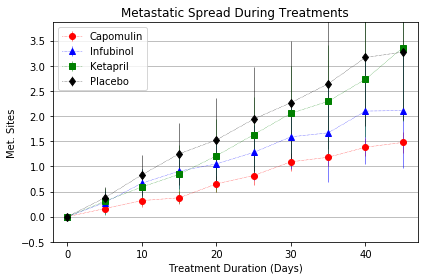

In [89]:
 #Generate the Plot (with Error Bars)
# Create scatter plot for Capomulin values
plt.errorbar(metastatic_sites["Timepoint"],metastatic_sites["Capomulin"], yerr=metastatic_error1,color = "red", fmt="o", linestyle=":", label="Capomulin", lw=0.5)

# Create a scatter plot for Infubinol values
plt.errorbar(metastatic_sites["Timepoint"],metastatic_sites["Infubinol"], yerr=errors2, color="blue", fmt="^", linestyle=":", label="Infubinol", lw=0.5)

# Create a scatter plot for Ketapril values
plt.errorbar(metastatic_sites["Timepoint"],metastatic_sites["Ketapril"], yerr=errors3, fmt="s",color = "green", linestyle=":", label="Ketapril", lw=0.5)

# Create a scatter plot for Placebo values
plt.errorbar(metastatic_sites["Timepoint"],metastatic_sites["Placebo"], yerr=errors4, color = "black", fmt="d", linestyle=":", label="Placebo", lw=0.5)

# Format the plot add labels and limits
plt.grid(axis="y")
plt.ylim(-0.5, max(metastatic_mean["Metastatic Sites"]) + 0.5)
plt.xlim(-2, max(metastatic_sites["Timepoint"]) +2)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatments")
plt.legend(loc="upper left", fancybox=True)

# Save the Figure
plt.tight_layout()
plt.savefig("../Images/spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [54]:
 #Store the Count of Mice Grouped by Drug and Timepoint
# Clean the data and select the columns for new dataframe
clinical_mouse = clinical_mouse_data[["Drug", "Timepoint", "Mouse ID"]]    

# Group new dataframe by drug and timepoint and count grouped mouses
mouse_count = clinical_mouse.groupby(["Drug", "Timepoint"]).count()

# Reset the index 
mouse_count = mouse_count.reset_index()

# Display the new dataframe
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [55]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = pd.pivot_table(mouse_count, index = "Timepoint", columns = "Drug", values = "Mouse ID")

# Preview the Data Frame
survival_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [56]:
# Reset the index value to select the necessrary columns
survival_df = survival_df.reset_index()
survival_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [57]:
# calculate the percentage values for each drug
# To find percentages for ech drug, divide count values to the first value at the beginning 
percentage_capomulin = (survival_df["Capomulin"])/(survival_df.loc[0,"Capomulin"])*100
percentage_infubinol = (survival_df["Infubinol"])/(survival_df.loc[0,"Infubinol"])*100
percentage_ketapril = (survival_df["Ketapril"])/(survival_df.loc[0,"Ketapril"])*100
percentage_placebo = (survival_df["Placebo"])/(survival_df.loc[0,"Placebo"])*100

In [58]:
# Create the new dataframe for desired drugs and percentage values
survival_rate = survival_df[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# Add percentage values to the new dataframe
survival_rate["Percentage for Capomulin"] = percentage_capomulin
survival_rate["Percentage for Infubinol"] = percentage_infubinol
survival_rate["Percentage for Ketapril"] = percentage_ketapril
survival_rate["Percentage for Placebo"]= percentage_placebo
survival_rate

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Percentage for Capomulin,Percentage for Infubinol,Percentage for Ketapril,Percentage for Placebo
0,0,25,25,25,25,100.0,100.0,100.0,100.0
1,5,25,25,23,24,100.0,100.0,92.0,96.0
2,10,25,21,22,24,100.0,84.0,88.0,96.0
3,15,24,21,19,20,96.0,84.0,76.0,80.0
4,20,23,20,19,19,92.0,80.0,76.0,76.0
5,25,22,18,19,17,88.0,72.0,76.0,68.0
6,30,22,17,18,15,88.0,68.0,72.0,60.0
7,35,22,12,17,14,88.0,48.0,68.0,56.0
8,40,21,10,15,12,84.0,40.0,60.0,48.0
9,45,21,9,11,11,84.0,36.0,44.0,44.0


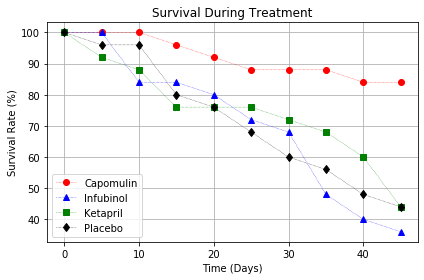

In [61]:
#Generate the Plot (Accounting for percentages)
plt.plot(survival_rate["Timepoint"], survival_rate["Percentage for Capomulin"], color = "red", linestyle=":", label="Capomulin", marker="o", lw=0.5)
plt.plot(survival_rate["Timepoint"], survival_rate["Percentage for Infubinol"], color = "blue", linestyle=":", label="Infubinol", marker="^", lw=0.5)
plt.plot(survival_rate["Timepoint"], survival_rate["Percentage for Ketapril"], color = "green", linestyle=":", label= "Ketapril", marker="s", lw=0.5)
plt.plot(survival_rate["Timepoint"], survival_rate["Percentage for Placebo"], color = "black", linestyle=":", label="Placebo", marker="d", lw=0.5)

# Add Title and labels
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.title("Survival During Treatment")
plt.legend(loc="lower left", fancybox=True)

# Add Grids 
plt.grid()

# Save the Figure
plt.tight_layout()
plt.savefig("../Images/survival.png")

# Show the Figure
plt.show()

## Sumary Bar Graph

In [62]:
 #Calculate the percent changes of total volume for each drug
# Use drug_data dataframe(timepoint, drug, and total volume) to calculate total volume changes
drug_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [63]:
# Find the percentage of changes for each drug between the first day and last day of treatment
total_volume_change = (drug_data.loc[45, :] - drug_data.loc[0,:]) / drug_data.loc[0,:] *100

# Display the change of values for each drug
total_volume_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [64]:
# Create a dataframe for the change values abd reset index
percentage_change = pd.DataFrame({"Percentage": total_volume_change})
percentage_df = percentage_change.reset_index()   

In [65]:
# Select Capomulin, Infubinol, Ketapril and Placebo values only
percentage_data = percentage_df.loc[(percentage_df["Drug"] == "Capomulin")
                                        | (percentage_df["Drug"] == "Infubinol")
                                        | (percentage_df["Drug"] == "Ketapril")
                                        | (percentage_df["Drug"] == "Placebo")]
# Display the dataframe
percentage_data                                       

,Drug,Percentage
0,Capomulin,-19.475303
2,Infubinol,46.123472
3,Ketapril,57.028795
5,Placebo,51.297960


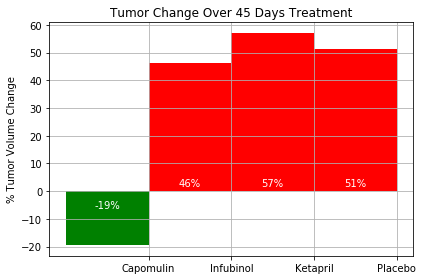

In [66]:
# Create the color list to set colors acording to percentage values
colors=["red" if x >0 else "green" for x in percentage_data["Percentage"]]

# Create the plot
bars = plt.bar(percentage_data["Drug"], percentage_data["Percentage"], width=-1, align="edge", color=colors)

# Add the percentage values to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            h = 1
        else:
            h = -7
        plt.text(rect.get_x() + rect.get_width()/2, h,'%d'%int(height)+'%',ha='center', va='bottom', color='white')

# Call the function to add the text to the plot
autolabel(bars)

# Add labels, and grid
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Days Treatment")
plt.grid()

# Save the figure
plt.tight_layout()
plt.savefig("../Images/change.png")

## Pymaceutical Analysis

* Survivol rate is the highest with Capomulin and the lowest with Infubinol after 45 days of treatment.
* Metastatic spread is the higest with Placebo and the lowest with Capomulin drug. 
* Most efficient drug for treatment is Capomulin. 